In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
train_df=pd.read_csv("census_income_train.csv",header=None)
train_df.columns =['age','worker_class','ind_recode', 'occ_recode','education','hourly_wage','enrolled_lastwk','marital','ind_code','occ_code',
                  'race','hisp','sex','union_memb','unemp_reason','emp_status','cap_gains','cap_loss','stock_divs','tax_status','region_prev_res',
                  'state_prev_res','det_family_stat','det_household_stat','inst_wt','migration_metro,','migration_reg_change','migration_same_reg',
                  'house_1yrago','migration_prev_sunbelt','num_persons_employer','IfU18_parent_status','birth_father_nation','birth_mother_nation',
                  'self_birth_nation','citizenship','ownbiz_selfempl','VA_questionaire','VAbenefits','wksworked_year','year','50K_label']
len(train_df.columns)

42

In [3]:
test_df=pd.read_csv("census_income_test.csv",header=None)
test_df.columns =['age','worker_class','ind_recode', 'occ_recode','education','hourly_wage','enrolled_lastwk','marital','ind_code','occ_code',
                  'race','hisp','sex','union_memb','unemp_reason','emp_status','cap_gains','cap_loss','stock_divs','tax_status','region_prev_res',
                  'state_prev_res','det_family_stat','det_household_stat','inst_wt','migration_metro,','migration_reg_change','migration_same_reg',
                  'house_1yrago','migration_prev_sunbelt','num_persons_employer','IfU18_parent_status','birth_father_nation','birth_mother_nation',
                  'self_birth_nation','citizenship','ownbiz_selfempl','VA_questionaire','VAbenefits','wksworked_year','year','50K_label']
test_df.sample(10)

,age,worker_class,ind_recode,occ_recode,education,hourly_wage,enrolled_lastwk,marital,ind_code,occ_code,...,birth_father_nation,birth_mother_nation,self_birth_nation,citizenship,ownbiz_selfempl,VA_questionaire,VAbenefits,wksworked_year,year,50K_label
17640,34,Self-employed-not incorporated,38,35,9th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Precision production craft & repair,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,52,95,- 50000.
62546,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5092,61,Private,29,38,Some college but no degree,0,Not in universe,Married-civilian spouse present,Transportation,Transportation and material moving,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
94835,30,Private,35,32,9th grade,0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Other service,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
46247,29,Not in universe,0,0,11th grade,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,12,94,- 50000.
18143,26,Private,4,2,Bachelors degree(BA AB BS),0,Not in universe,Never married,Construction,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
35379,29,Private,33,19,Some college but no degree,450,Not in universe,Married-civilian spouse present,Retail trade,Sales,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,51,94,- 50000.
67931,37,Private,29,23,Associates degree-academic program,0,Not in universe,Married-civilian spouse present,Transportation,Adm support including clerical,...,United-States,Mexico,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
76491,5,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
31822,31,Not in universe,0,0,11th grade,0,Not in universe,Separated,Not in universe or children,Not in universe,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,16,94,- 50000.


In [4]:
test_df.isnull().sum()

age                       0
worker_class              0
ind_recode                0
occ_recode                0
education                 0
hourly_wage               0
enrolled_lastwk           0
marital                   0
ind_code                  0
occ_code                  0
race                      0
hisp                      0
sex                       0
union_memb                0
unemp_reason              0
emp_status                0
cap_gains                 0
cap_loss                  0
stock_divs                0
tax_status                0
region_prev_res           0
state_prev_res            0
det_family_stat           0
det_household_stat        0
inst_wt                   0
migration_metro,          0
migration_reg_change      0
migration_same_reg        0
house_1yrago              0
migration_prev_sunbelt    0
num_persons_employer      0
IfU18_parent_status       0
birth_father_nation       0
birth_mother_nation       0
self_birth_nation         0
citizenship         

In [5]:
train_df.isnull().sum()

age                       0
worker_class              0
ind_recode                0
occ_recode                0
education                 0
hourly_wage               0
enrolled_lastwk           0
marital                   0
ind_code                  0
occ_code                  0
race                      0
hisp                      0
sex                       0
union_memb                0
unemp_reason              0
emp_status                0
cap_gains                 0
cap_loss                  0
stock_divs                0
tax_status                0
region_prev_res           0
state_prev_res            0
det_family_stat           0
det_household_stat        0
inst_wt                   0
migration_metro,          0
migration_reg_change      0
migration_same_reg        0
house_1yrago              0
migration_prev_sunbelt    0
num_persons_employer      0
IfU18_parent_status       0
birth_father_nation       0
birth_mother_nation       0
self_birth_nation         0
citizenship         

In [6]:
train_df.dtypes

age                         int64
worker_class               object
ind_recode                  int64
occ_recode                  int64
education                  object
hourly_wage                 int64
enrolled_lastwk            object
marital                    object
ind_code                   object
occ_code                   object
race                       object
hisp                       object
sex                        object
union_memb                 object
unemp_reason               object
emp_status                 object
cap_gains                   int64
cap_loss                    int64
stock_divs                  int64
tax_status                 object
region_prev_res            object
state_prev_res             object
det_family_stat            object
det_household_stat         object
inst_wt                   float64
migration_metro,           object
migration_reg_change       object
migration_same_reg         object
house_1yrago               object
migration_prev

In [7]:
train_str_list = train_df.columns[train_df.dtypes == "object"].tolist()
test_str_list = test_df.columns[test_df.dtypes == "object"].tolist()
for str_obj_col in train_str_list:   
    train_df[str_obj_col] = train_df[str_obj_col].astype("category")
for str_obj_col2 in test_str_list:
    test_df[str_obj_col2] = test_df[str_obj_col2].astype("category")
test_df.dtypes

age                          int64
worker_class              category
ind_recode                   int64
occ_recode                   int64
education                 category
hourly_wage                  int64
enrolled_lastwk           category
marital                   category
ind_code                  category
occ_code                  category
race                      category
hisp                      category
sex                       category
union_memb                category
unemp_reason              category
emp_status                category
cap_gains                    int64
cap_loss                     int64
stock_divs                   int64
tax_status                category
region_prev_res           category
state_prev_res            category
det_family_stat           category
det_household_stat        category
inst_wt                    float64
migration_metro,          category
migration_reg_change      category
migration_same_reg        category
house_1yrago        

In [8]:
train_df=train_df.astype({'ind_recode': 'category','occ_recode':'category','ownbiz_selfempl':'category','VAbenefits':'category','year':'category'})
test_df=test_df.astype({'ind_recode': 'category','occ_recode':'category','ownbiz_selfempl':'category','VAbenefits':'category','year':'category'})

In [9]:
train_int_list = train_df.columns[train_df.dtypes == "int64"].tolist()
test_int_list = test_df.columns[test_df.dtypes == "int64"].tolist()

In [10]:
for int_col in train_int_list:   
    train_df[int_col] = train_df[int_col].astype("float64")
for int_col2 in test_int_list:
    test_df[int_col2] = test_df[int_col2].astype("float64")
test_df.dtypes

age                        float64
worker_class              category
ind_recode                category
occ_recode                category
education                 category
hourly_wage                float64
enrolled_lastwk           category
marital                   category
ind_code                  category
occ_code                  category
race                      category
hisp                      category
sex                       category
union_memb                category
unemp_reason              category
emp_status                category
cap_gains                  float64
cap_loss                   float64
stock_divs                 float64
tax_status                category
region_prev_res           category
state_prev_res            category
det_family_stat           category
det_household_stat        category
inst_wt                    float64
migration_metro,          category
migration_reg_change      category
migration_same_reg        category
house_1yrago        

In [11]:
for (columnName, columnData) in train_df.iteritems():
    print('Column Name : ', columnName)
    print(train_df[columnName].unique())

Column Name :  age
[73. 58. 18.  9. 10. 48. 42. 28. 47. 34.  8. 32. 51. 46. 26. 13. 39. 16.
 35. 12. 27. 56. 55.  2.  1. 37.  4. 63. 25. 81. 11. 30.  7. 66. 84. 52.
  5. 36. 72. 61. 41. 90. 49.  6.  0. 33. 57. 50. 24. 17. 53. 40. 54. 22.
 29. 85. 38. 76. 21. 31. 74. 19. 15.  3. 43. 68. 71. 45. 62. 23. 69. 75.
 44. 59. 60. 64. 65. 70. 67. 78. 20. 14. 83. 86. 89. 77. 79. 82. 80. 87.
 88.]
Column Name :  worker_class
[' Not in universe', ' Self-employed-not incorporated', ' Private', ' Local government', ' Federal government', ' Self-employed-incorporated', ' State government', ' Never worked', ' Without pay']
Categories (9, object): [' Federal government', ' Local government', ' Never worked', ' Not in universe', ..., ' Self-employed-incorporated', ' Self-employed-not incorporated', ' State government', ' Without pay']
Column Name :  ind_recode
[0, 4, 40, 34, 43, ..., 21, 28, 20, 51, 10]
Length: 52
Categories (52, int64): [0, 1, 2, 3, ..., 48, 49, 50, 51]
Column Name :  occ_recode
[0, 34

In [12]:
for (columnName, columnData) in test_df.iteritems():
    print('Column Name : ', columnName)
    print(test_df[columnName].unique())

Column Name :  age
[38. 44.  2. 35. 49. 13.  1. 61.  7. 30. 85. 33. 26. 46. 19. 11. 23. 27.
  8. 29. 40. 24. 45. 41. 14. 73. 78. 81. 15. 68. 28. 54. 37. 82. 55. 77.
 53. 25.  0. 75. 80. 10. 22. 43. 48.  5. 16. 18. 50. 64.  3. 72. 47. 39.
 51. 12. 67. 59. 42.  4. 32. 83. 57.  6. 60. 34. 20. 21. 76. 71. 31. 17.
 63.  9. 56. 36. 65. 69. 70. 62. 58. 66. 74. 90. 79. 89. 52. 84. 87. 86.
 88.]
Column Name :  worker_class
[' Private', ' Self-employed-not incorporated', ' Not in universe', ' Local government', ' State government', ' Never worked', ' Self-employed-incorporated', ' Federal government', ' Without pay']
Categories (9, object): [' Federal government', ' Local government', ' Never worked', ' Not in universe', ..., ' Self-employed-incorporated', ' Self-employed-not incorporated', ' State government', ' Without pay']
Column Name :  ind_recode
[6, 37, 0, 29, 4, ..., 28, 51, 20, 26, 10]
Length: 52
Categories (52, int64): [0, 1, 2, 3, ..., 48, 49, 50, 51]
Column Name :  occ_recode
[36, 12

In [13]:
train_df['50K_label'] = (train_df['50K_label']).astype(object)
train_df.loc[train_df['50K_label']==' - 50000.', '50K_label'] = 0
train_df.loc[train_df['50K_label']==' 50000+.', '50K_label'] =1

In [14]:
test_df['50K_label'] = (test_df['50K_label']).astype(object)
test_df.loc[test_df['50K_label']==' - 50000.', '50K_label'] = 0
test_df.loc[test_df['50K_label']==' 50000+.', '50K_label'] =1

In [15]:
test_df.sample(25)

,age,worker_class,ind_recode,occ_recode,education,hourly_wage,enrolled_lastwk,marital,ind_code,occ_code,...,birth_father_nation,birth_mother_nation,self_birth_nation,citizenship,ownbiz_selfempl,VA_questionaire,VAbenefits,wksworked_year,year,50K_label
47322,29.0,Private,4,26,Associates degree-occup /vocational,0.0,Not in universe,Married-civilian spouse present,Construction,Adm support including clerical,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,30.0,94,0
68309,48.0,Private,46,43,11th grade,0.0,Not in universe,Married-civilian spouse present,Forestry and fisheries,Farming forestry and fishing,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52.0,95,0
42380,23.0,Private,11,37,Some college but no degree,0.0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,36.0,94,0
99409,13.0,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0.0,94,0
85189,11.0,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0.0,94,0
4052,4.0,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0.0,95,0
52297,41.0,Local government,50,3,Associates degree-occup /vocational,0.0,Not in universe,Divorced,Public administration,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52.0,95,0
6172,1.0,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0.0,94,0
25781,47.0,Not in universe,0,0,High school graduate,0.0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0.0,95,0
799,25.0,Private,4,26,High school graduate,0.0,Not in universe,Never married,Construction,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52.0,95,0


In [16]:
train_df.describe()

,age,hourly_wage,cap_gains,cap_loss,stock_divs,inst_wt,num_persons_employer,wksworked_year
count,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,23.174897
std,22.310895,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,24.411488
min,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000
25%,15.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000
50%,33.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,8.000000
75%,50.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,52.000000
max,90.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,52.000000


In [17]:
test_df.describe()

,age,hourly_wage,cap_gains,cap_loss,stock_divs,inst_wt,num_persons_employer,wksworked_year
count,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000
mean,34.628596,54.461268,425.788577,35.919458,192.494727,1739.542838,1.956156,23.185331
std,22.333449,270.202643,4616.795578,265.525252,1841.728492,994.900902,2.364331,24.389184
min,0.000000,0.000000,0.000000,0.000000,0.000000,43.260000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,1058.050000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,1615.395000,1.000000,8.000000
75%,50.000000,0.000000,0.000000,0.000000,0.000000,2187.277500,4.000000,52.000000
max,90.000000,9900.000000,99999.000000,4608.000000,99999.000000,16258.200000,6.000000,52.000000


<AxesSubplot:xlabel='hourly_wage'>

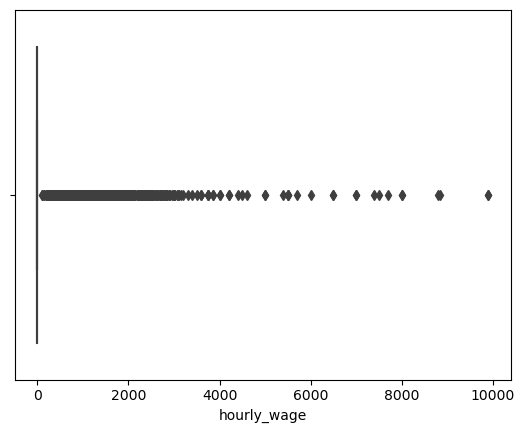

In [18]:
sns.boxplot(x=test_df["hourly_wage"])

<AxesSubplot:xlabel='age'>

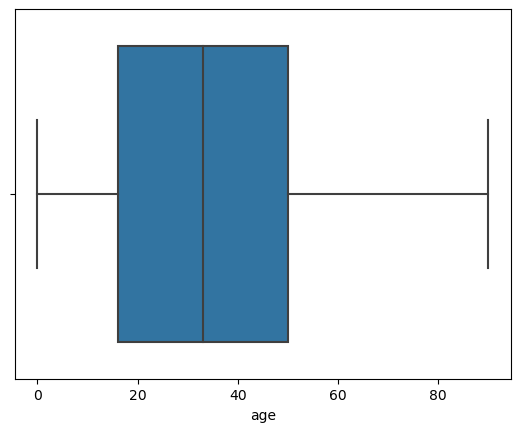

In [19]:
sns.boxplot(x=test_df["age"])

<AxesSubplot:xlabel='cap_gains'>

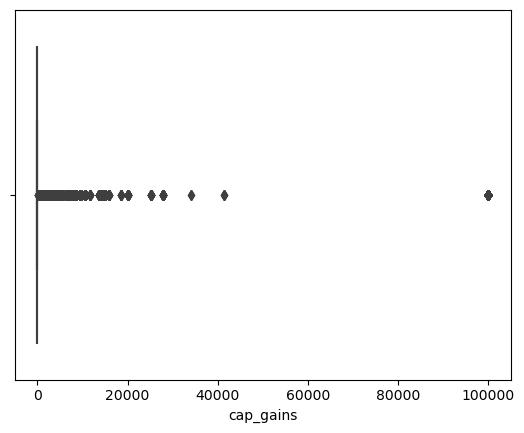

In [20]:
sns.boxplot(x=test_df["cap_gains"])

<AxesSubplot:xlabel='cap_loss'>

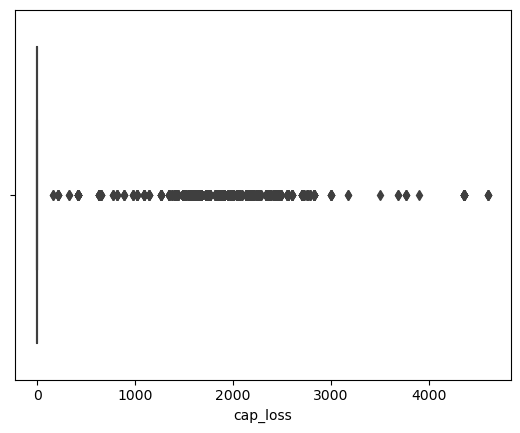

In [21]:
sns.boxplot(x=test_df["cap_loss"])

<AxesSubplot:xlabel='stock_divs'>

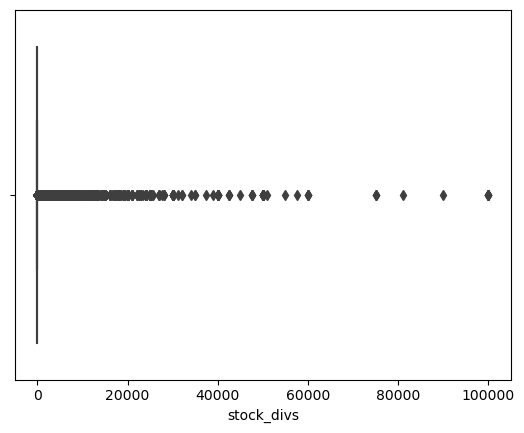

In [22]:
sns.boxplot(x=test_df["stock_divs"])

<AxesSubplot:xlabel='num_persons_employer'>

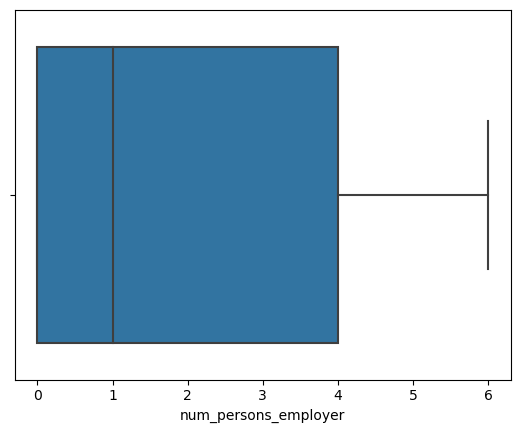

In [23]:
sns.boxplot(x=test_df["num_persons_employer"])


<AxesSubplot:xlabel='wksworked_year'>

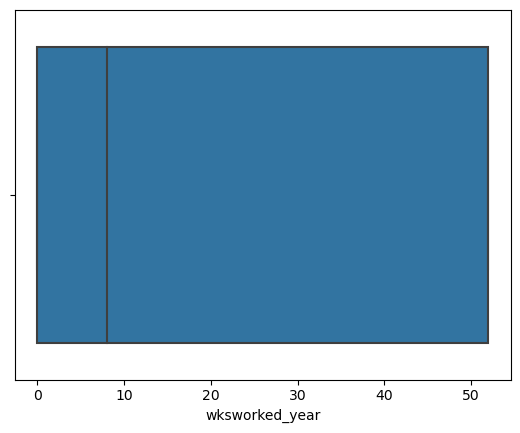

In [24]:
sns.boxplot(x=test_df["wksworked_year"])

In [25]:
mms = MinMaxScaler()
train_df[['hourly_wage','cap_gains','cap_loss','stock_divs','num_persons_employer','wksworked_year']]=mms.fit_transform(train_df[['hourly_wage','cap_gains','cap_loss','stock_divs','num_persons_employer','wksworked_year']])
test_df[['hourly_wage','cap_gains','cap_loss','stock_divs','num_persons_employer','wksworked_year']]=mms.fit_transform(test_df[['hourly_wage','cap_gains','cap_loss','stock_divs','num_persons_employer','wksworked_year']])

In [26]:
stsc = StandardScaler()
train_df[['age']]=stsc.fit_transform(train_df[['age']])
test_df[['age']]=stsc.fit_transform(test_df[['age']])
train_df.sample(15)

,age,worker_class,ind_recode,occ_recode,education,hourly_wage,enrolled_lastwk,marital,ind_code,occ_code,...,birth_father_nation,birth_mother_nation,self_birth_nation,citizenship,ownbiz_selfempl,VA_questionaire,VAbenefits,wksworked_year,year,50K_label
25403,0.246777,Private,44,10,Some college but no degree,0.0,Not in universe,Divorced,Social services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0.057692,94,0
46886,0.694990,Local government,43,12,Masters degree(MA MS MEng MEd MSW MBA),0.0,Not in universe,Married-civilian spouse present,Education,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,1.000000,95,0
55358,-0.918576,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0.000000,95,0
199105,1.053560,Local government,43,26,High school graduate,0.0,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0.826923,94,0
149871,-1.008218,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0.000000,94,0
144040,-1.501252,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0.000000,95,0
137279,-1.366789,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0.000000,94,0
145054,0.874275,Local government,50,4,Some college but no degree,0.0,Not in universe,Married-civilian spouse present,Public administration,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,1.000000,95,0
167318,1.546594,Not in universe,0,0,High school graduate,0.0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0.000000,95,0
82050,0.874275,Private,43,3,Masters degree(MA MS MEng MEd MSW MBA),0.0,Not in universe,Divorced,Education,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,1.000000,95,1


In [27]:
train_df['50K_label'].value_counts()

0    187141
1     12382
Name: 50K_label, dtype: int64

In [28]:
test_df['50K_label'].value_counts()

0    93576
1     6186
Name: 50K_label, dtype: int64

In [29]:
train_df.to_csv('clean_train.csv')
test_df.to_csv('clean_test.csv')

In [30]:
train_df

,age,worker_class,ind_recode,occ_recode,education,hourly_wage,enrolled_lastwk,marital,ind_code,occ_code,...,birth_father_nation,birth_mother_nation,self_birth_nation,citizenship,ownbiz_selfempl,VA_questionaire,VAbenefits,wksworked_year,year,50K_label
0,1.725879,Not in universe,0,0,High school graduate,0.0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0.0,95,0
1,1.053560,Self-employed-not incorporated,4,34,Some college but no degree,0.0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,1.0,94,0
2,-0.739291,Not in universe,0,0,10th grade,0.0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0.0,95,0
3,-1.142682,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0.0,94,0
4,-1.097861,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0.0,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,2.353376,Not in universe,0,0,7th and 8th grade,0.0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0.0,95,0
199519,1.367309,Self-employed-incorporated,37,2,11th grade,0.0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,1.0,94,0
199520,0.560526,Not in universe,0,0,Some college but no degree,0.0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,1.0,95,0
199521,-0.828933,Not in universe,0,0,10th grade,0.0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0.0,95,0
